### Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.
Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [3]:
data_raw = pd.read_csv("/Users/uhith/Desktop/ML/Logistic Regression/Loan_Modelling.csv")

In [4]:
data = data_raw.copy()

In [5]:
data.sample(n=10, random_state=34)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3696,3697,31,5,78,94309,2,0.2,1,0,0,0,0,0,1
4198,4199,61,36,50,96003,4,1.7,1,189,0,0,0,1,0
1032,1033,37,12,42,94720,3,0.7,2,0,0,0,0,1,1
3301,3302,48,22,59,90086,4,2.6,1,0,0,0,0,1,1
698,699,64,38,59,92028,1,2.5,3,220,0,0,0,0,0
3895,3896,36,12,59,94104,3,2.0,1,216,0,0,0,0,0
450,451,51,25,69,95747,1,0.3,1,0,0,0,0,1,1
586,587,39,14,101,94305,2,0.4,1,0,0,0,0,1,1
1604,1605,55,29,111,90502,2,3.6,3,0,1,0,0,0,1
1003,1004,25,1,62,94720,4,0.0,1,229,0,0,0,1,0


In [6]:
# Size of the data
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in the data set')

There are 5000 rows and 14 columns in the data set


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
# Are there any missing values?
data.isna().sum(axis=0)

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

#### There are no missing values in the dataset

In [9]:
# Distribution of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Some observations:
1. Min experience is -3. This is not feasible so we might have to dig deeper about this.
2. We need to convert variables such as ZipCode, Family, Education, Personal_Loan, Securities_Account, CD_Account, Online, CreditCrad to categorical

In [10]:
# Take a deeper look at the experince column
num_exp_neg = data[data['Experience'] < 0].shape[0]
print(f'There are {num_exp_neg} rows where experience is a negative number')

There are 52 rows where experience is a negative number


#### There are 52 rows with experience less than 0. 

In [11]:
data[data['Experience'] < 0]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


#### Replacing the -ve experience columns with median doesn't make sense because the median is 20 and all the rows with experience < 0 are with the age < 30. The best option is to replace the -ve experiences with 0. 

In [12]:
def replace_negative_values_with_0(x):
    if isinstance(x,int):
        if x < 0:
            return 0
        else:
            return x
    else:
        return np.NaN

In [13]:
data['Experience'] = data['Experience'].apply(replace_negative_values_with_0)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [15]:
# Drop the ID column since it doesn't provide any value
data.drop('ID', axis=1, inplace=True)

In [16]:
cat_col = ['ZIPCode', 'Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
for col in cat_col:
    data[col] = data[col].astype('category')

In [17]:
def print_value_counts(cat_col):
    for col in cat_col:
        print(f'value counts of {col}, printing only top 10 values: ')
        val_counts = data[col].value_counts(ascending=False)
        print(val_counts[:10])
        print('\n') 

In [18]:
# Look at the value count of categorical variables
num_display = 10
print_value_counts(cat_col)

value counts of ZIPCode, printing only top 10 values: 
94720    169
94305    127
95616    116
90095     71
93106     57
93943     54
92037     54
91320     53
94025     52
91711     52
Name: ZIPCode, dtype: int64


value counts of Family, printing only top 10 values: 
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


value counts of Education, printing only top 10 values: 
1    2096
3    1501
2    1403
Name: Education, dtype: int64


value counts of Personal_Loan, printing only top 10 values: 
0    4520
1     480
Name: Personal_Loan, dtype: int64


value counts of Securities_Account, printing only top 10 values: 
0    4478
1     522
Name: Securities_Account, dtype: int64


value counts of CD_Account, printing only top 10 values: 
0    4698
1     302
Name: CD_Account, dtype: int64


value counts of Online, printing only top 10 values: 
1    2984
0    2016
Name: Online, dtype: int64


value counts of CreditCard, printing only top 10 values: 
0    3530
1    1470
Name: C

#### We can see a huge class imbalance in Personal_Loan, CD_Account and Securities_Account columns

#### Let us extract City and County from the Zipcode. 

In [19]:
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)

In [20]:
# zipcode to city
def zipcode_to_city(x):
    return search.by_zipcode(str(x)).major_city
def zipcode_to_county(x):
    return search.by_zipcode(str(x)).county

In [21]:
data['City'] = data['ZIPCode'].apply(zipcode_to_city).astype('category')
data['County'] = data['ZIPCode'].apply(zipcode_to_county).astype('category')

In [22]:
data.sample(n=10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City,County
1905,25,0,112,92507,2,2.00,1,241,0,0,0,1,0,Riverside,Riverside County
4541,62,38,124,95023,1,3.80,1,405,0,0,0,1,0,Hollister,San Benito County
1901,43,19,201,94305,2,6.67,1,0,0,1,0,1,0,Stanford,Santa Clara County
4590,58,34,151,94022,3,0.60,2,0,1,0,0,0,0,Los Altos,Santa Clara County
3763,62,36,81,95051,3,4.40,1,0,0,0,0,0,1,Santa Clara,Santa Clara County
3945,29,3,123,92821,3,5.60,3,428,1,0,0,1,0,Brea,Orange County
979,50,26,48,94720,4,0.10,3,0,0,0,0,0,1,Berkeley,Alameda County
4706,60,36,8,92626,2,1.00,1,0,0,0,0,0,0,Costa Mesa,Orange County
356,56,30,24,94704,2,0.40,3,88,0,0,0,0,0,Berkeley,Alameda County
2187,54,30,40,90024,2,1.00,3,0,0,0,0,0,0,Los Angeles,Los Angeles County


In [23]:
print_value_counts(['City', 'County'])

value counts of City, printing only top 10 values: 
Los Angeles      375
San Diego        269
San Francisco    257
Berkeley         241
Sacramento       148
Palo Alto        130
Stanford         127
Davis            121
La Jolla         112
Santa Barbara    103
Name: City, dtype: int64


value counts of County, printing only top 10 values: 
Los Angeles County      1095
San Diego County         568
Santa Clara County       563
Alameda County           500
Orange County            339
San Francisco County     257
San Mateo County         204
Sacramento County        184
Santa Barbara County     154
Yolo County              130
Name: County, dtype: int64




In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  City                4966 non-null   category
 14  County              4966 non-null   category
dtypes: category(10), float64(1), int64(4)


#### We have missing values in City and County. Let's fill them with mode

In [25]:
data['City'].fillna(value=data['City'].mode()[0], inplace=True)
data['County'].fillna(value=data['County'].mode()[0], inplace=True)

In [26]:
# Let's remove zipcode from the data
data.drop('ZIPCode', axis=1, inplace=True)

In [27]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
 12  City                5000 non-null   category
 13  County              5000 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 258.5 KB


#### Data is free from missing values now

In [28]:
# Copy the data for Decision tree modeling here
data_dt = data.copy()
data_dt.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City,County
0,25,1,49,4,1.6,1,0,0,1,0,0,0,Pasadena,Los Angeles County
1,45,19,34,3,1.5,1,0,0,1,0,0,0,Los Angeles,Los Angeles County
2,39,15,11,1,1.0,1,0,0,0,0,0,0,Berkeley,Alameda County
3,35,9,100,1,2.7,2,0,0,0,0,0,0,San Francisco,San Francisco County
4,35,8,45,4,1.0,2,0,0,0,0,0,1,Northridge,Los Angeles County


### Visualization, Univariate and Bivariate analysis

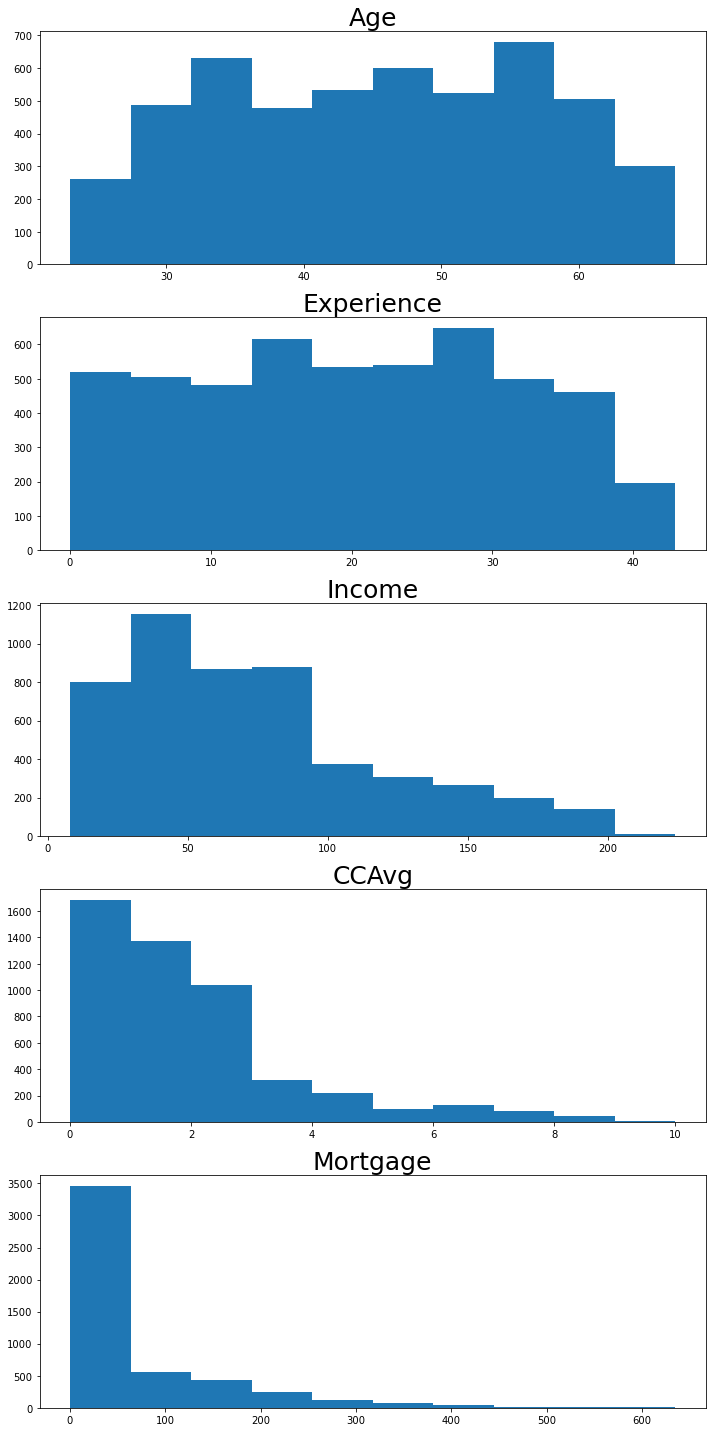

In [29]:
# Univariate analysis
numeric_col = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(10,20))
for i in range(len(numeric_col)):
    plt.subplot(5,1,i+1)
    plt.hist(data[numeric_col[i]])
    plt.tight_layout()
    plt.title(numeric_col[i],fontsize=25)
    
plt.show()

#### Observations
1. Income, CCAvg, Mortgage are right skewed.
2. Age and Experience are close to a uniform distribution

In [30]:
# Applying log transformation to reduce the skewness
for col in ['Income', 'CCAvg', 'Mortgage']:
    data[col] = np.log(data[col]+1)

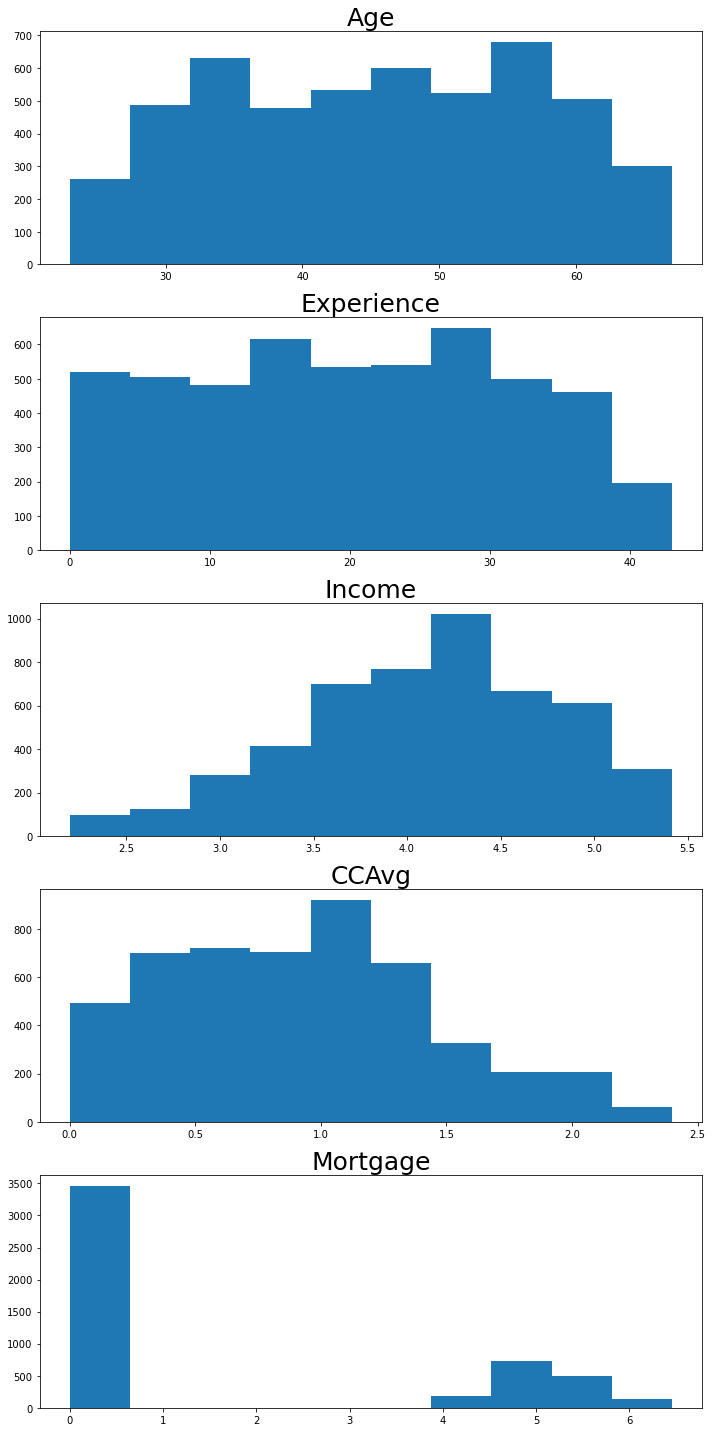

In [31]:
numeric_col = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(10,20))
for i in range(len(numeric_col)):
    plt.subplot(5,1,i+1)
    plt.hist(data[numeric_col[i]])
    plt.tight_layout()
    plt.title(numeric_col[i],fontsize=25)
    
plt.show()

#### Observations
1. There is not much improvement after log transformation except in Income
2. There are many users without any mortgage. 

In [32]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    plt.xticks(rotation=45)
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage 
    plt.show() # show the plot

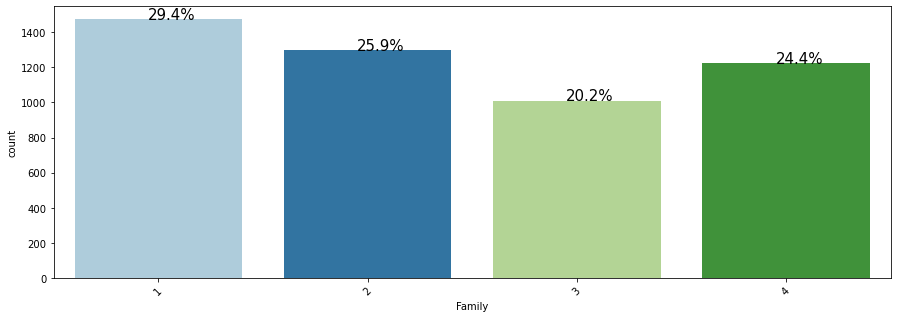

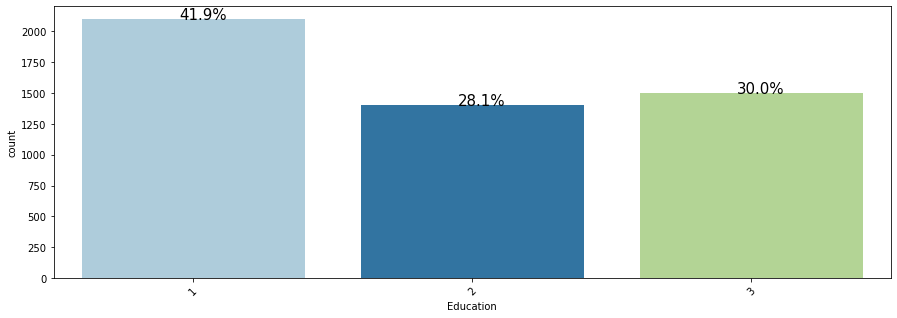

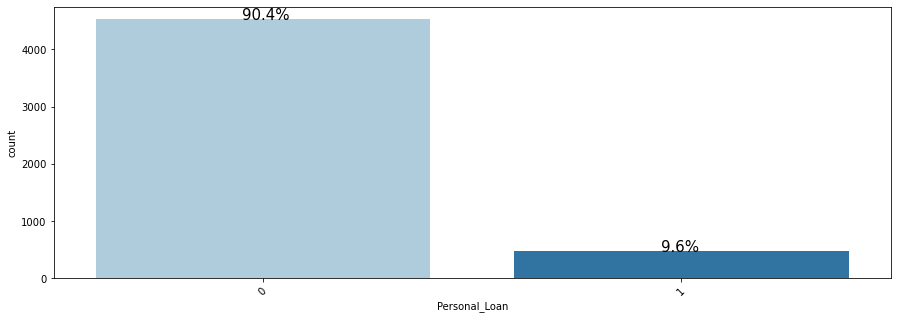

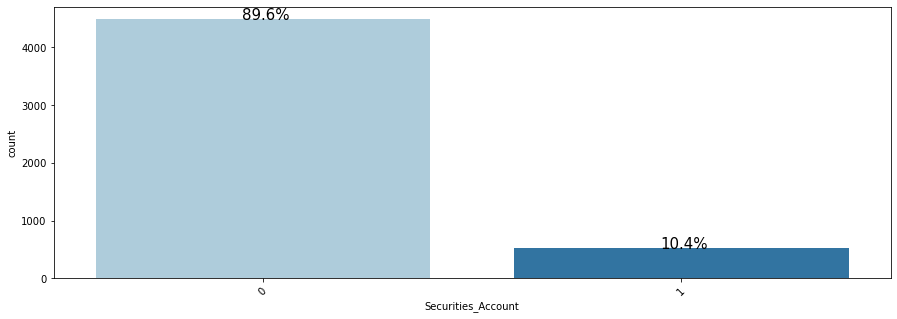

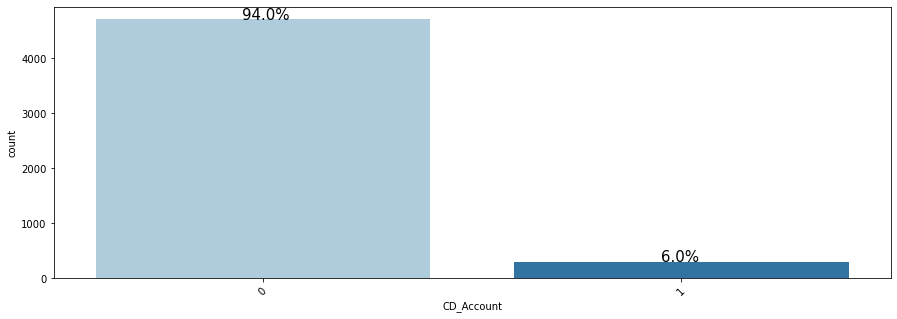

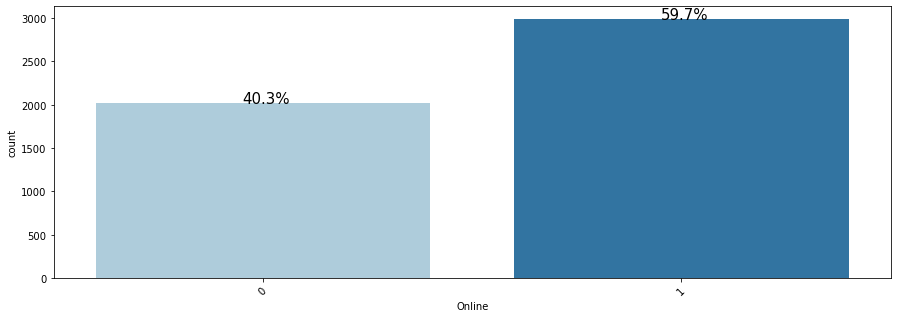

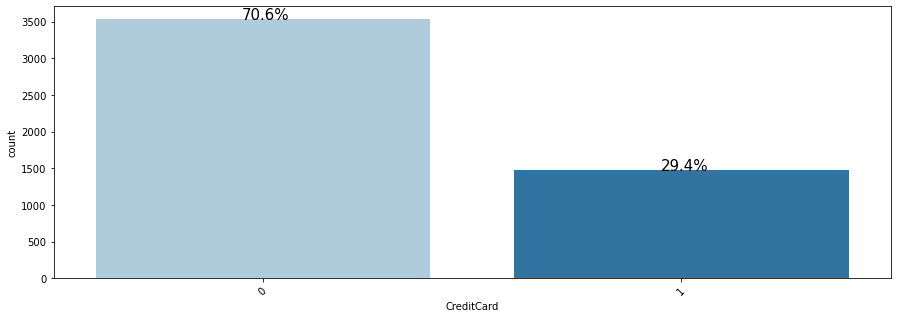

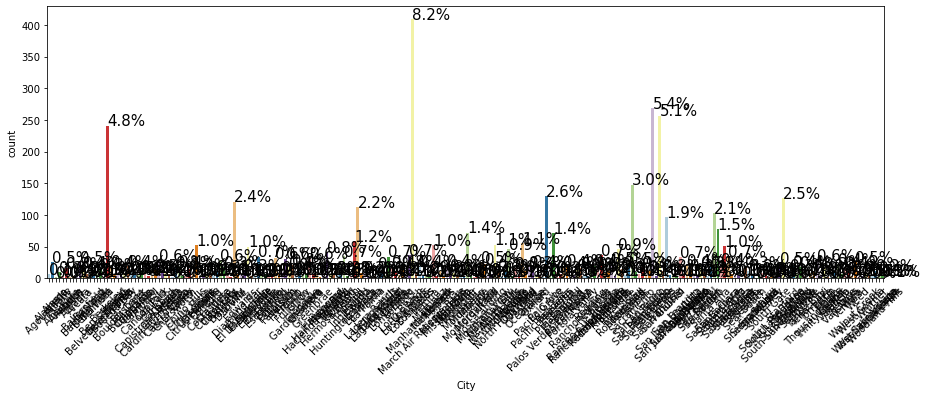

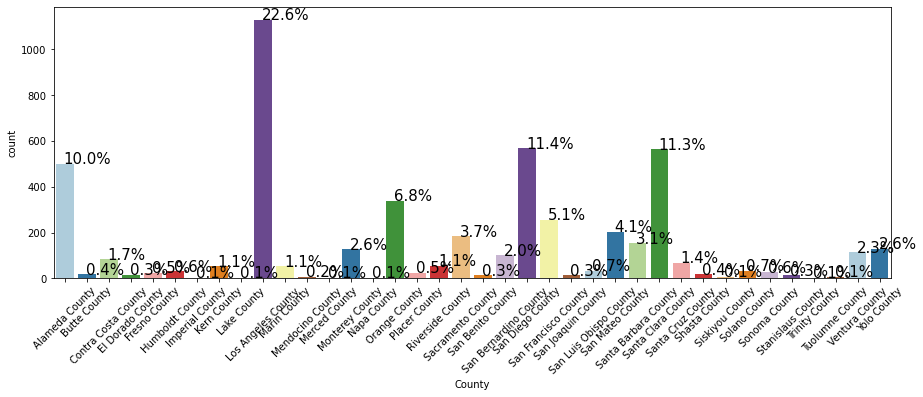

In [33]:
cat_col = ['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'City', 'County']
for col in cat_col:
    perc_on_bar(col)

### Bivariate analysis

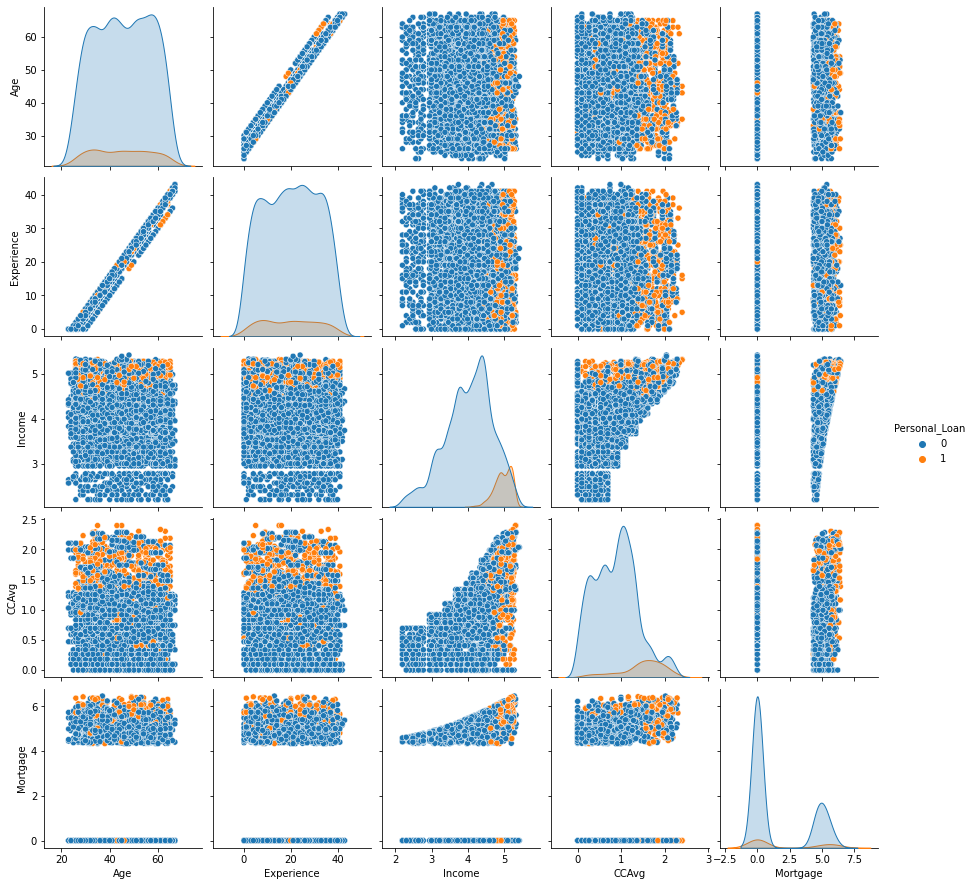

In [34]:
sns.pairplot(
    data,
    x_vars=["Age", "Experience", "Income", "CCAvg", "Mortgage"],
    y_vars=["Age", "Experience", "Income", "CCAvg", "Mortgage"],
    hue='Personal_Loan'
)

* Observations
1. Age and experience seems highly positively correlated
2. People with higher income has high chance of taking a personal loan
3. People with mortgages has high chance of taking a personal loan

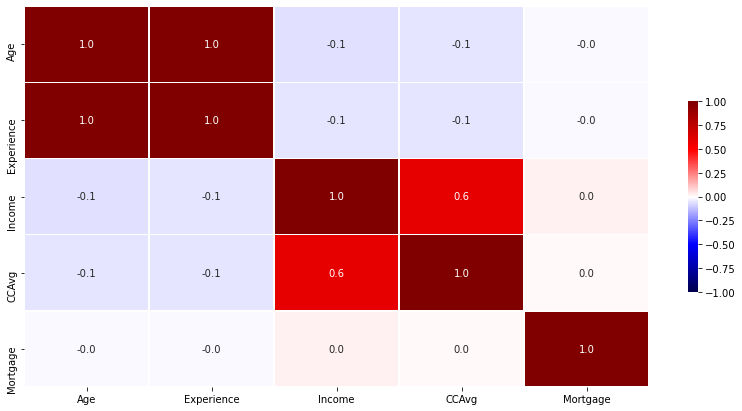

In [35]:
# Correlation
corr = data[numeric_col].corr()
fig, ax = plt.subplots(figsize=(14, 7))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

##### 
1. Age is fully correlated with Experience
2. Income is positively correlated with CCAvg

In [36]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['Personal_Loan'],margins=True)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['Personal_Loan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


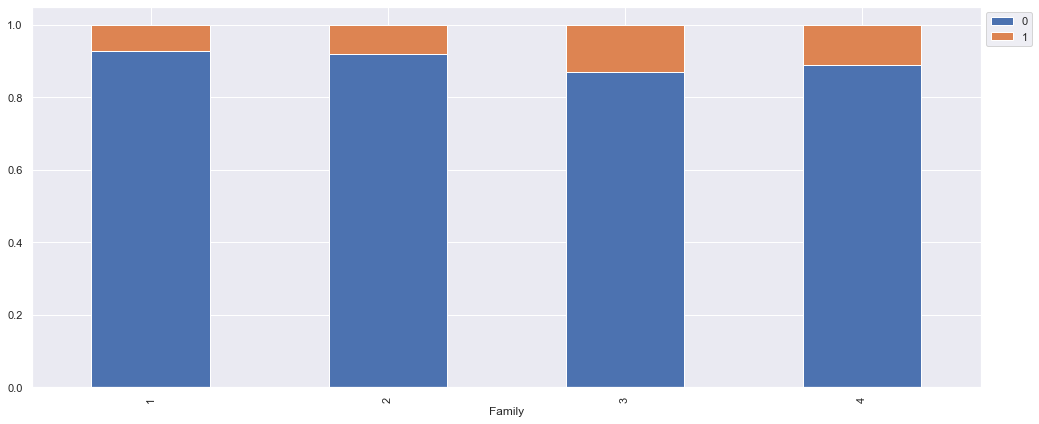

In [37]:
stacked_plot(data['Family'])

1. Users with more members in the family might prefer to buy a personal loan

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


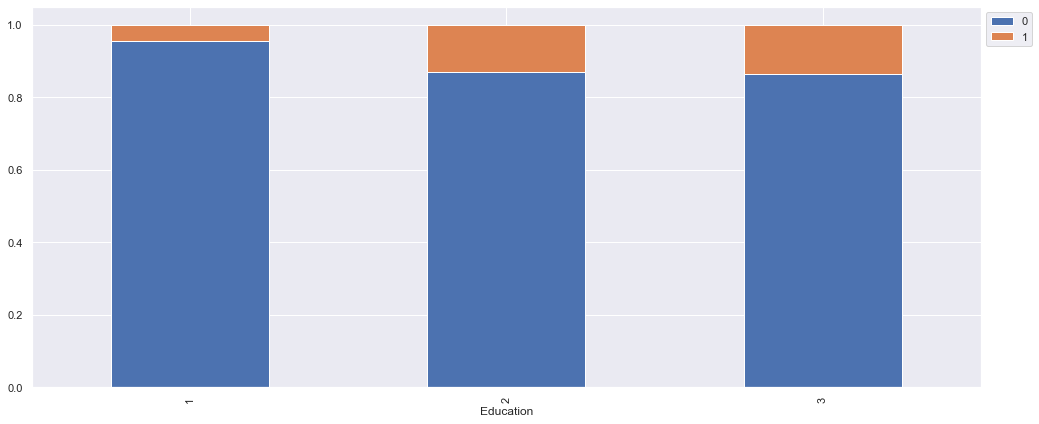

In [38]:
stacked_plot(data['Education'])

1. Users with higher education might prefer to buy a personal loan

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


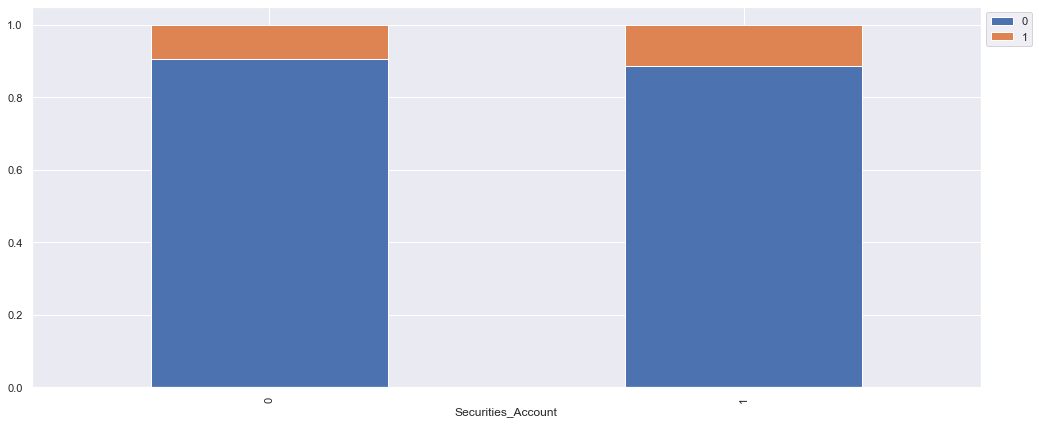

In [39]:
stacked_plot(data['Securities_Account'])

1. We can't infer a lot from this because the percentages are almost similar. Also, note the class imbalance

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


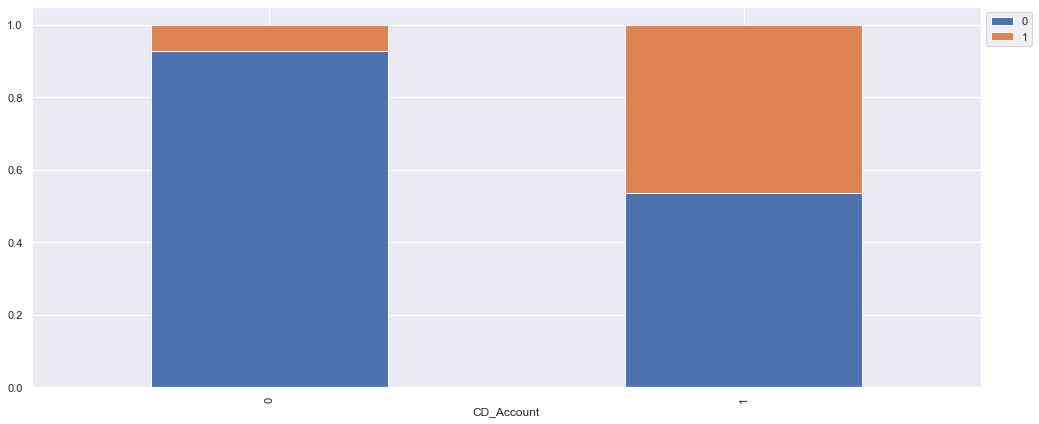

In [40]:
stacked_plot(data['CD_Account'])

1. Users with CD account might prefer to buy a personal loan

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


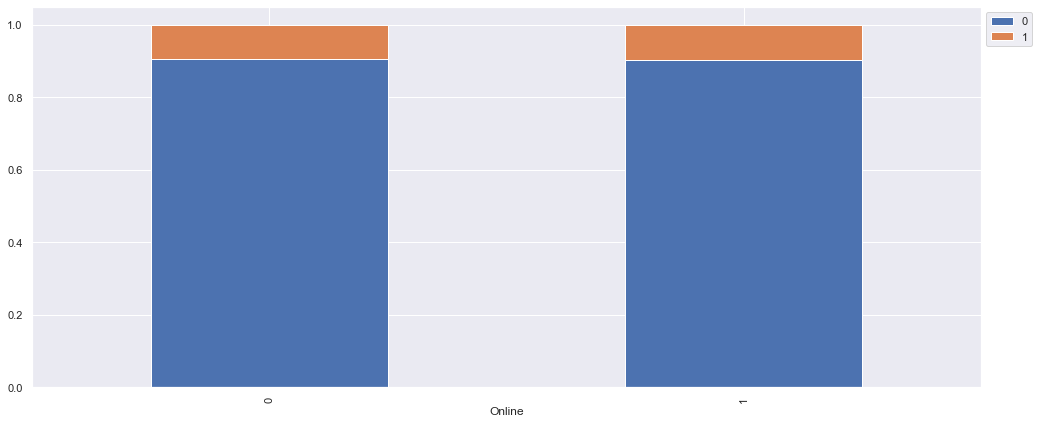

In [41]:
stacked_plot(data['Online'])

1. It doesn't look like there is any relation between whether a user has online account and whether they buy a personal loan

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


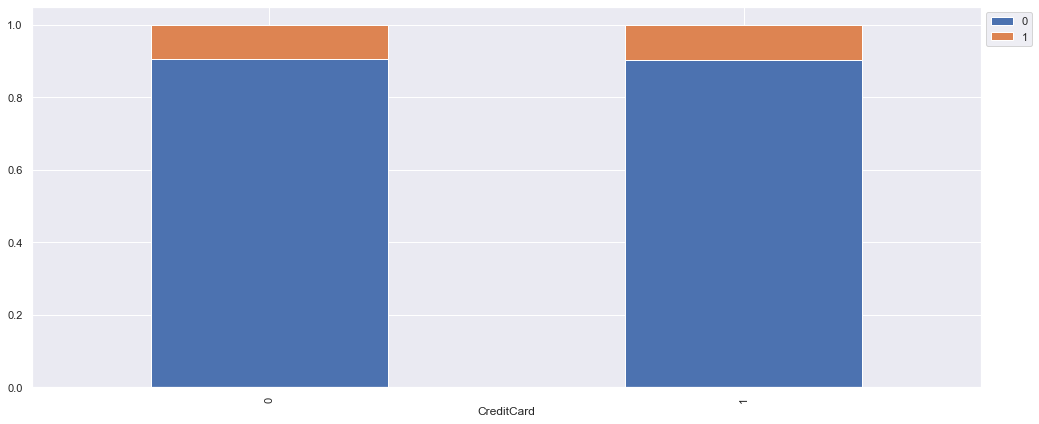

In [42]:
stacked_plot(data['CreditCard'])

1. It looks like there is any relation between whether a user has credit card from other banks and whether they buy a personal loan

Personal_Loan              0    1   All
County                                 
Alameda County           456   44   500
Butte County              17    2    19
Contra Costa County       73   12    85
El Dorado County          16    1    17
Fresno County             24    2    26
Humboldt County           30    2    32
Imperial County            3    0     3
Kern County               47    7    54
Lake County                4    0     4
Los Angeles County      1015  114  1129
Marin County              48    6    54
Mendocino County           7    1     8
Merced County              4    0     4
Monterey County          113   15   128
Napa County                3    0     3
Orange County            309   30   339
Placer County             22    2    24
Riverside County          50    6    56
Sacramento County        169   15   184
San Benito County         14    0    14
San Bernardino County     98    3   101
San Diego County         509   59   568
San Francisco County     238   19   257


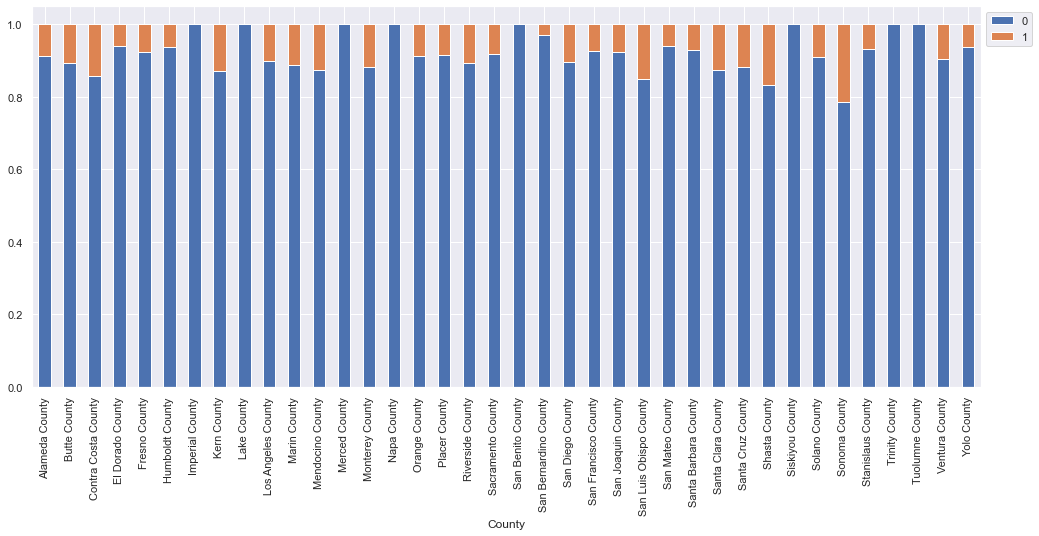

In [43]:
stacked_plot(data['County'])

1. We can see that the chance of people buying personal loan is higher in some counties

In [44]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='Personal_Loan'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution of people who refused personal loan')
    sns.distplot(data[(data[target] == '0')][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title("Distribution of people who bought personal loan")
    sns.distplot(data[(data[target] == '1')][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title('Boxplot w.r.t Personal_Loan')
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow')
    axs[1,1].set_title('Boxplot w.r.t Personal_Loan - Without outliers')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow') #turning off outliers from boxplot
    plt.tight_layout()
    plt.show()

In [45]:
data['Personal_Loan'] = data['Personal_Loan'].astype('str')

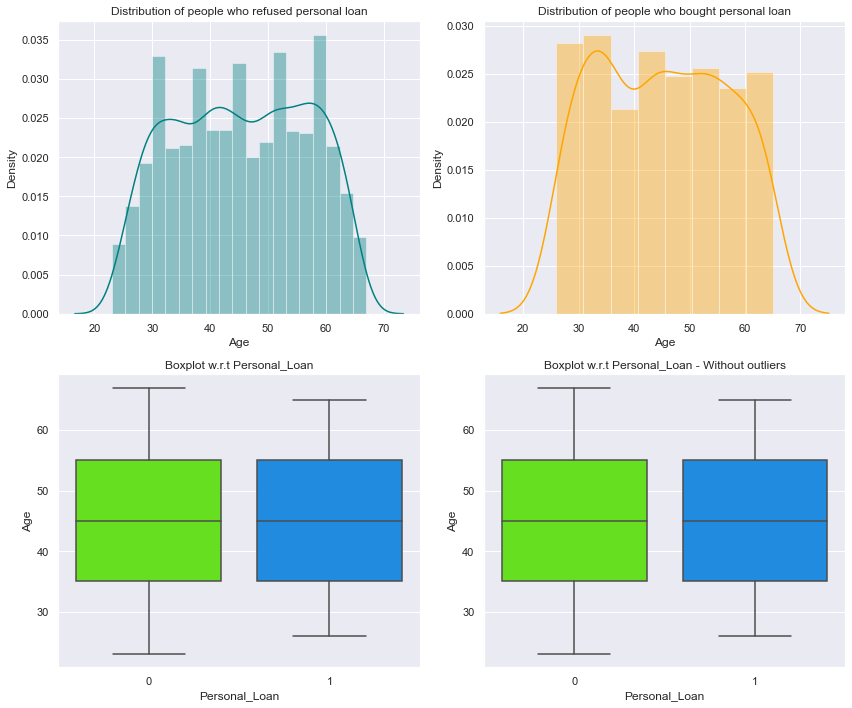

In [46]:
plot('Age')

1. People between ages 25 and 65 are more likely to get a personal loan. If the user's age is below 25 or above 65, it is likely that the user refused a personal loan

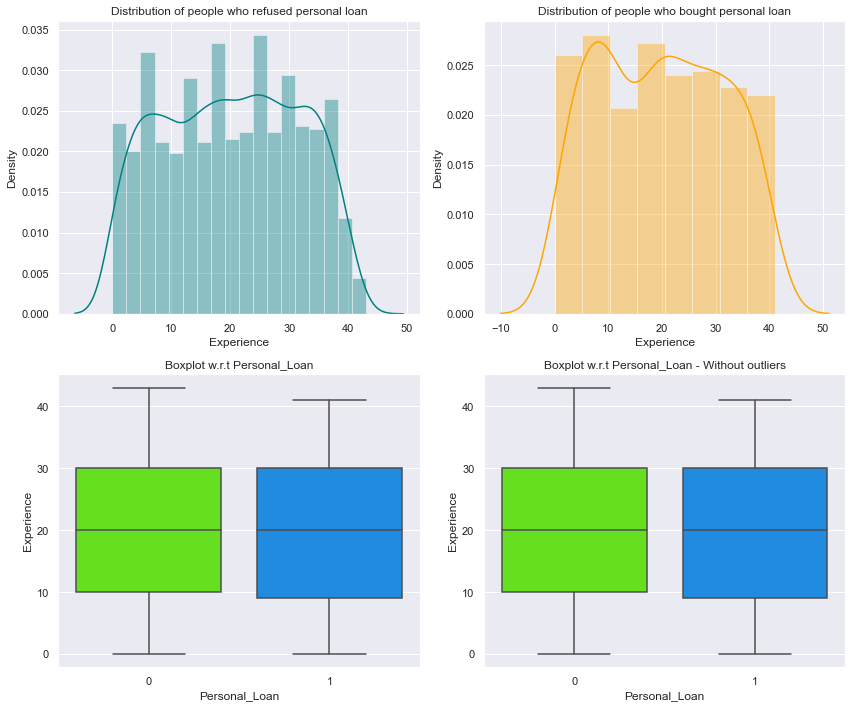

In [47]:
plot('Experience')

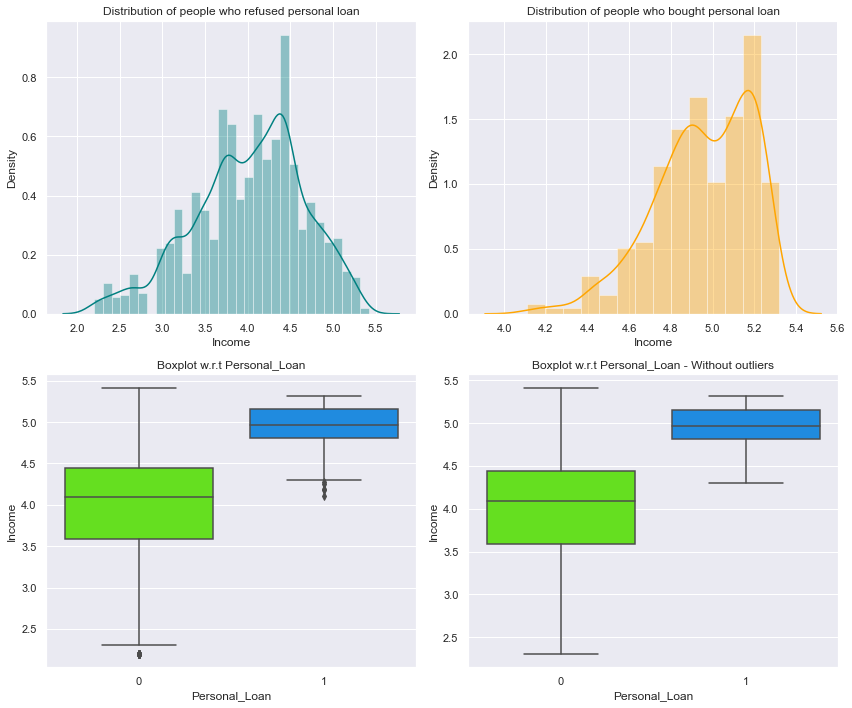

In [48]:
plot('Income')

1. People with higher income have higher chances of buying a personal loan.

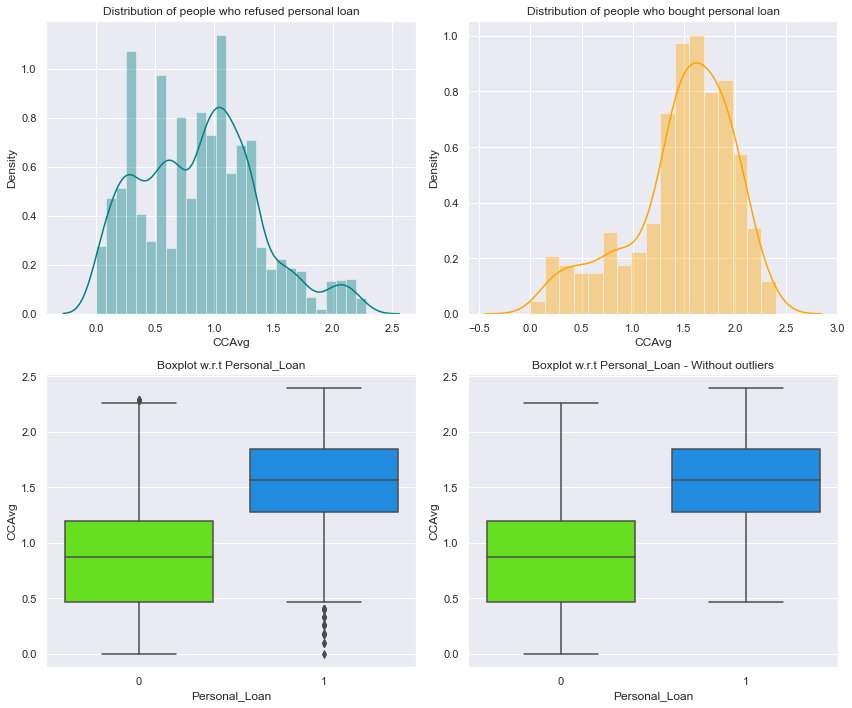

In [49]:
plot('CCAvg')

1. People with higher credit card spending have higher chances of buying a personal loan.

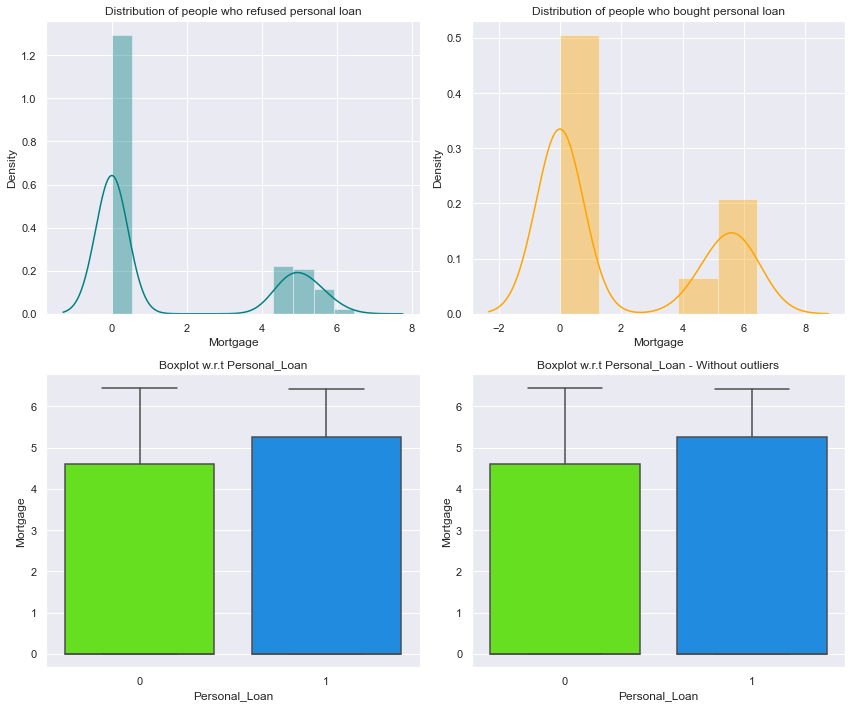

In [50]:
plot('Mortgage')

1. Majority of the users in the dataset don't have mortage. It doesn't look easy to infer anything from these graphs
2. Let's bin the mortage column and try to infer more

In [51]:
# Binning - Creating columns for Mortage values between '0', '1-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700'
data['Mortage_binned'] = pd.cut(data_raw['Mortgage'], [-1, 1, 100, 200, 300, 400, 500, 600, 700],
                               labels=['0', '1-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700'])

Personal_Loan      0    1   All
Mortage_binned                 
0               3150  312  3462
1-100            269   13   282
100-200          719   39   758
200-300          257   40   297
300-400           88   40   128
400-500           28   20    48
500-600            7   14    21
600-700            2    2     4
All             4520  480  5000
------------------------------------------------------------------------------------------------------------------------


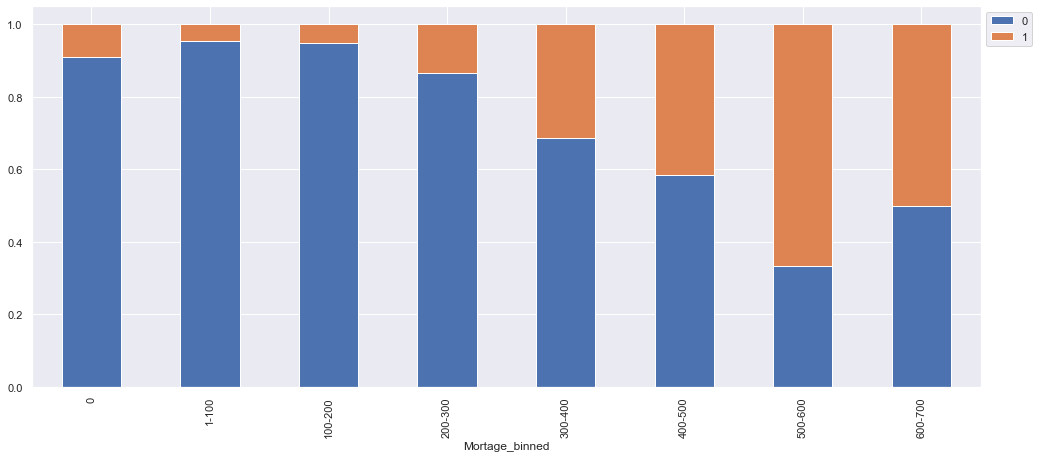

In [52]:
stacked_plot(data['Mortage_binned'])

1. The resulting plot with binning looks much better
2. Users with higher mortgage value tend to buy a personal loan as plot suggests

In [53]:
# Remove mortgage column from the dataset
data.drop('Mortgage', axis=1, inplace=True)
# Remove City column since county is sufficient
data.drop('City', axis=1, inplace=True)

#### Outlier detection and treatment


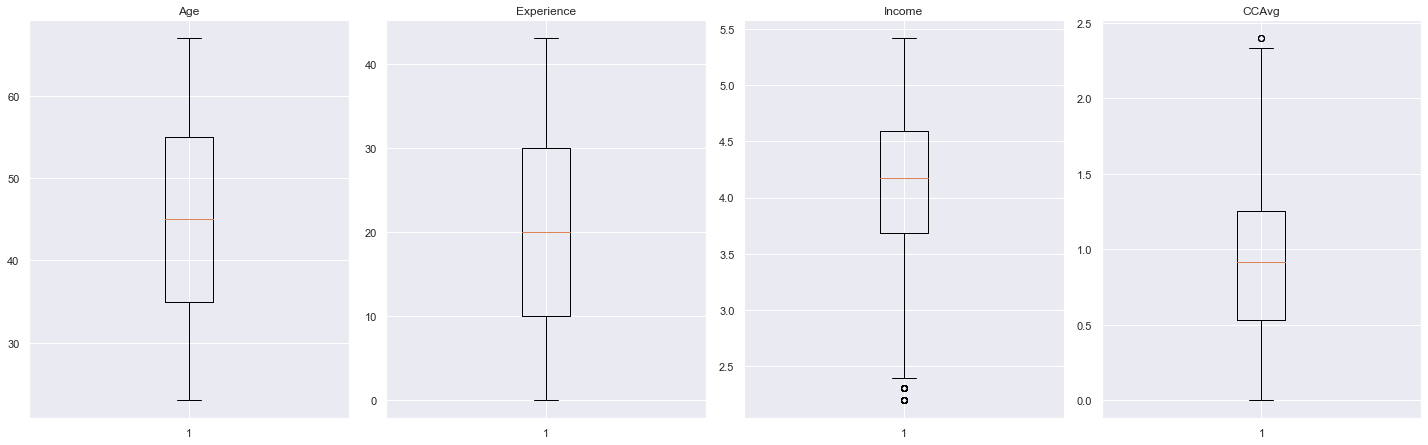

In [54]:
# outlier detection using boxplot
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

1. We can see upper outliers in CCAvg and lower outliers in Income

In [55]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    data: data frame
    '''
    for c in col_list:
        data = treat_outliers(data,c)
        
    return data

In [56]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns
 
numerical_col = [ele for ele in numerical_col] 
data = treat_outliers_all(data,numerical_col)

#### Data preperation

In [57]:
# Library to split data
from sklearn.model_selection import train_test_split
data['Personal_Loan'] = data['Personal_Loan'].apply(lambda x: 1 if x=='1' else 0)
data = pd.get_dummies(data,drop_first=True)

# using MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data)
data = pd.DataFrame(data=data_norm, columns=data.columns)

X = data.drop(['Personal_Loan'], axis=1)
Y = data['Personal_Loan']

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)

In [58]:
## Building the model

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a person will buy personal loan but he actually doesn't want to buy.
2. Predicting a person doesn't buy a personal loan but he actually want to buy.

### Which case is more important? 
* Case 2 is important since we will be an missing opportunity to offer a personal loan.


### How to reduce this loss?
*  `recall` should be maximized, greater the recall higher the chances of identifying users who are interested in personal loan.

**Fist, let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [59]:
from sklearn.metrics import recall_score,accuracy_score,f1_score,precision_score
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)

    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [60]:
from sklearn import metrics
def make_confusion_matrix(model,test_X,y_actual,labels=[0, 1]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - 1","Actual - 0"]],
                  columns = [i for i in ['Predicted - 1','Predicted - 0']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Building logistic regression model

### Before making the model, first let's check if our variables has multicollinearity

* There are different ways of detecting (or testing) multi-collinearity, one such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use.

In [61]:
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# dataframe with numerical column only
num_feature_set = X.copy()
num_feature_set = add_constant(num_feature_set)
num_feature_set = num_feature_set.astype(float)

In [62]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                            33.544886
Age                              94.063098
Experience                       93.902643
Income                            1.783108
CCAvg                             1.579318
Family_2                          1.413819
Family_3                          1.392249
Family_4                          1.433693
Education_2                       1.299465
Education_3                       1.332064
Securities_Account_1              1.142992
CD_Account_1                      1.331941
Online_1                          1.052140
CreditCard_1                      1.122313
County_Butte County               1.038975
County_Contra Costa County        1.155196
County_El Dorado County           1.033223
County_Fresno County              1.048548
County_Humboldt County            1.059861
County_Imperial County            1.007977
County_Kern County                1.099849
County_Lake County                1.013128
County_Los Angeles 

In [63]:
# Removing Experience since the VIF score is high
num_feature_set = num_feature_set.drop('Experience',axis=1)

In [64]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                            31.385722
Age                               1.019752
Income                            1.780081
CCAvg                             1.573410
Family_2                          1.413813
Family_3                          1.385366
Family_4                          1.433072
Education_2                       1.283566
Education_3                       1.248159
Securities_Account_1              1.142576
CD_Account_1                      1.330550
Online_1                          1.052110
CreditCard_1                      1.122311
County_Butte County               1.038799
County_Contra Costa County        1.155189
County_El Dorado County           1.033108
County_Fresno County              1.048546
County_Humboldt County            1.059565
County_Imperial County            1.007656
County_Kern County                1.099755
County_Lake County                1.012604
County_Los Angeles County         2.532429
County_Marin County

#### There is no multicollinearity in the dataset now

In [65]:
X_train, X_test, y_train, y_test = train_test_split(num_feature_set, Y, test_size=0.30, random_state = 1)
y_test.value_counts()

0.0    1351
1.0     149
Name: Personal_Loan, dtype: int64

Accuracy on training set :  0.9082857142857143
Accuracy on test set :  0.902
Recall on training set :  0.9244712990936556
Recall on test set :  0.8657718120805369
Precision on training set :  0.5083056478405316
Precision on test set :  0.50390625
F1 on training set :  0.6559485530546624
F1 on test set :  0.6370370370370371


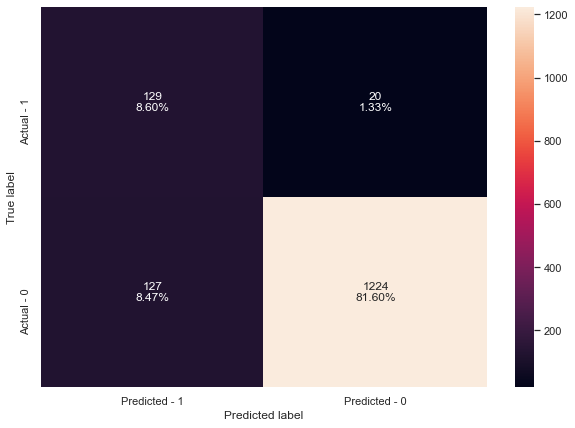

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=1,class_weight='balanced')
lg = model.fit(X_train, y_train)
scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,flag=True)

# creating confusion matrix
make_confusion_matrix(lg,X_test,y_test)

#### Let's check another assumption of linear regression 
1. Logistic regression assumes linearity of independent variables and log odds. It means the independent variables should be linearly related to log odds.

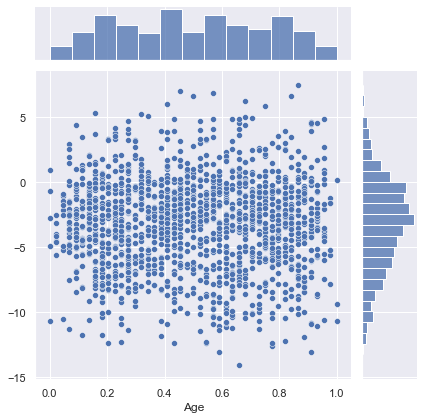

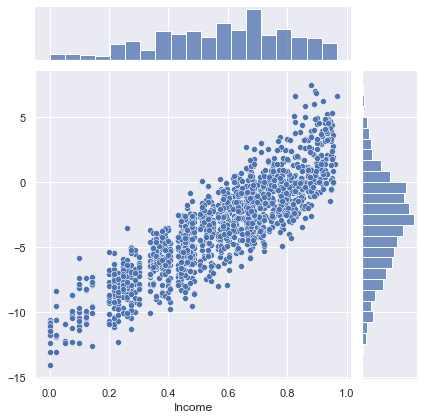

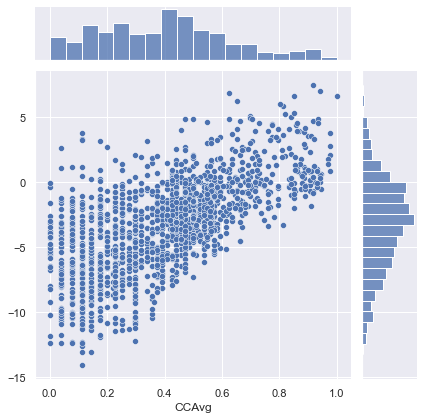

In [67]:
from scipy.special import logit, expit
# plot Age vs log(odds)
sns.jointplot(x=X_test['Age'], y=logit(lg.predict_proba(X_test)[:,1]))
# plot Income vs log(odds)
sns.jointplot(x=X_test['Income'], y=logit(lg.predict_proba(X_test)[:,1]))
# plot CCAvg vs log(odds)
sns.jointplot(x=X_test['CCAvg'], y=logit(lg.predict_proba(X_test)[:,1]))

#### Observations:
1. We can see that Income and CCAvg are linearly related to log(odds)
2. Age is not linearly related to log(odds).

#### Action: Removing Age variable from the dataset

In [68]:
# Removing Age since the linearity assumption of logistic regression is not satisfied
num_feature_set = num_feature_set.drop('Age',axis=1)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(num_feature_set, Y, test_size=0.30, random_state = 1)

#### Let's try to improve the model by tuning hyper parameters of logistic regression

In [70]:
from sklearn.model_selection import GridSearchCV
# Choose the type of classifier. 
estimator = LogisticRegression(random_state=1,class_weight = 'balanced',max_iter=5000)

# Grid of parameters to choose from
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,10,100,1000]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, grid_values, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=5000,
                   random_state=1)

#### We can see that the GridSearch selected C=0.5

In [71]:
scores_LR = get_metrics_score(estimator,X_train,X_test,y_train,y_test,flag=True)

Accuracy on training set :  0.9031428571428571
Accuracy on test set :  0.896
Recall on training set :  0.9305135951661632
Recall on test set :  0.8590604026845637
Precision on training set :  0.4935897435897436
Precision on test set :  0.4866920152091255
F1 on training set :  0.6450261780104712
F1 on test set :  0.6213592233009708


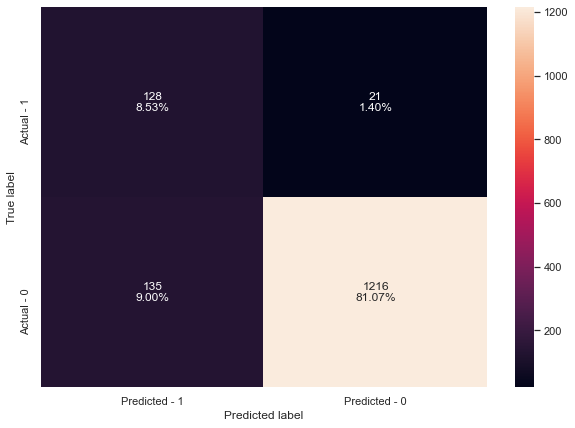

In [72]:
# creating confusion matrix
make_confusion_matrix(estimator,X_test,y_test)

In [73]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

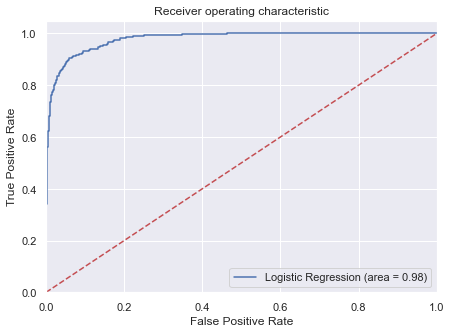

In [74]:
logit_roc_auc_train = roc_auc_score(y_train, estimator.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, estimator.predict_proba(X_train)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

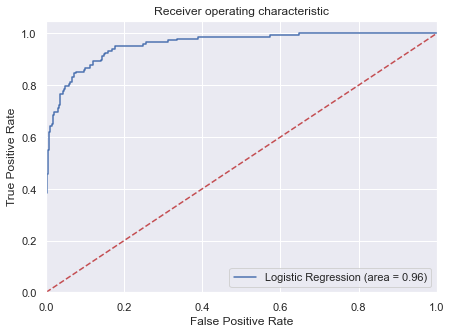

In [75]:
logit_roc_auc_test = roc_auc_score(y_test, estimator.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, estimator.predict_proba(X_test)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a generalized performance on training and test set. This indicates that there is no overfitting or underfitting 

In [76]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, estimator.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.3486301214276207


* Optimal threshold for this model is 0.348. This is where TPR is high and FPR is low

In [77]:
# Model prediction with optimal threshold

pred_train_opt = (estimator.predict_proba(X_train)[:,1]>optimal_threshold)
pred_test_opt = (estimator.predict_proba(X_test)[:,1]>optimal_threshold)

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt) )
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('F1 Score on train data:',f1_score(y_train, pred_train_opt) )
print('F1 Score on test data:',f1_score(y_test, pred_test_opt))

Accuracy on train data: 0.846
Accuracy on test data: 0.8353333333333334
Recall on train data: 0.9667673716012085
Recall on test data: 0.9463087248322147
Precision on train data: 0.37735849056603776
Precision on test data: 0.37105263157894736
F1 Score on train data: 0.542832909245123
F1 Score on test data: 0.5330812854442344


* After using an optimum threshold, the logistic regression model performance improved a lot. With 94% recall on both training and testing tests, we can infer that there is no underfitting or overfitting

### Finding the coefficients

In [78]:
pd.DataFrame(estimator.coef_[0], X_train.columns, columns=['coef']).T

,const,Income,CCAvg,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County,Mortage_binned_1-100,Mortage_binned_100-200,Mortage_binned_200-300,Mortage_binned_300-400,Mortage_binned_400-500,Mortage_binned_500-600,Mortage_binned_600-700
coef,-0.00177,10.726006,3.033926,0.096891,1.402159,0.927838,1.902823,2.072668,-1.01515,2.91767,-0.47136,-0.796852,-0.320613,0.433766,-0.19861,-0.175013,-0.234988,-0.02741,0.583371,-0.050637,0.256265,0.525713,-0.295047,-0.104551,0.105459,-0.029716,-0.164794,0.442128,1.492574,0.327885,-0.273405,-0.795116,0.228476,0.156986,0.009366,-0.324918,-0.614448,0.265034,0.205021,-0.120073,-0.309652,-0.117596,-0.00323,0.367243,-0.25165,-0.189092,-0.123522,0.059949,-0.310882,0.238995,-0.363264,0.003989,0.762415,0.478258,0.197707,0.474172


###  Converting coefficients to odds

**Odds:**
* When coefficient is b , then change in odds is (exp(b)-1)*100 %
* Probability = odd/(1+odd)

In [79]:
change_odds = (np.exp(np.abs(estimator.coef_[0]))-1)*100
pd.set_option('display.max_rows',None)
df = pd.DataFrame(change_odds, X_train.columns, columns=['odds'])
df['odds'] = df['odds'].apply(lambda x: "{:.6f}".format(x))
df.T

,const,Income,CCAvg,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County,Mortage_binned_1-100,Mortage_binned_100-200,Mortage_binned_200-300,Mortage_binned_300-400,Mortage_binned_400-500,Mortage_binned_500-600,Mortage_binned_600-700
odds,0.177206,4552351.116147,1977.864275,10.174044,306.396520,152.903460,570.479744,694.599400,175.977680,1749.813731,60.217193,121.854557,37.797170,54.305840,21.970659,19.126223,26.489388,2.778932,79.206890,5.194123,29.209463,69.166457,34.318882,11.021243,11.122071,3.016164,17.914968,55.601466,344.853218,38.802884,31.443240,121.469781,25.668330,16.997981,0.940995,38.391655,84.863630,30.347503,22.755082,12.757932,36.295117,12.478978,0.323508,44.374930,28.614560,20.815263,13.147496,6.178269,36.462831,26.997204,43.801491,0.399678,114.344721,61.326124,21.860586,60.668336


### Coefficient interpretations 

* Income: 1 unit change in the income of a person will change the odds of a person buying a personal loan by 4552351%, thus making the income as the most important feature to determine if a person will buy a personal loan or not.
* CCAvg: 1 unit change in the average spending on credit cards will change the odds of a person buying a personal loan by 1977%
* Education_3: The odds of a person who is advanced/professional buying a personal loan is 694% more than a person with just an undergrad degree
* CD_Account_1: The odds of a person who has a CD account buying a personal loan is 1749% more than a person without CD account
* The odds of a person buying a personal loan if he is in Riverside county is more than a person living in Sacramento county.

`Interpretation for other attributes can be made similarly.`

### Assumptions of logistic regression
Logistic regression does not make many of the key assumptions of linear regression and general
linear models that are based on ordinary least squares algorithms – particularly regarding linearity,
normality, homoscedasticity, and measurement level.

A few assumptions of logistic regression are:
1. No multicollinearity among the independent variables. We performed a VIF test and removed the variables with vif score > 5. 
2. Logistic regression assumes linearity of independent variables and log odds. We have verified this and removed Age variable accordingly.
3. There is no influential values (extreme values or outliers) in the continuous predictors. We removed all the outliers in the data preprocessing step
4. Binary logistic regression requires the dependent variable to be binary. In our case, the dependent variable is either 1 or 0. So, this assumption is satisfied.

## Modeling with Decision Trees

In [80]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [81]:
model = DecisionTreeClassifier(criterion='gini',class_weight='balanced',random_state=1)

In [82]:
data_dt.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City,County
0,25,1,49,4,1.6,1,0,0,1,0,0,0,Pasadena,Los Angeles County
1,45,19,34,3,1.5,1,0,0,1,0,0,0,Los Angeles,Los Angeles County
2,39,15,11,1,1.0,1,0,0,0,0,0,0,Berkeley,Alameda County
3,35,9,100,1,2.7,2,0,0,0,0,0,0,San Francisco,San Francisco County
4,35,8,45,4,1.0,2,0,0,0,0,0,1,Northridge,Los Angeles County


In [83]:
# Remove City column since county is sufficient
data_dt.drop('City', axis=1, inplace=True)
data_dt['Personal_Loan'] = data_dt['Personal_Loan'].astype(int)
data_dt = pd.get_dummies(data_dt,drop_first=True)

In [84]:
data_dt.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal_Loan,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County
0,25,1,49,1.6,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45,19,34,1.5,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,35,8,45,1.0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:

X = data_dt.drop('Personal_Loan',axis=1)                                                 
y = data_dt['Personal_Loan'].astype('int64')  
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3500, 51) (1500, 51)


In [86]:
column_names = list(X_train.columns)                    
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1', 'County_Butte County', 'County_Contra Costa County', 'County_El Dorado County', 'County_Fresno County', 'County_Humboldt County', 'County_Imperial County', 'County_Kern County', 'County_Lake County', 'County_Los Angeles County', 'County_Marin County', 'County_Mendocino County', 'County_Merced County', 'County_Monterey County', 'County_Napa County', 'County_Orange County', 'County_Placer County', 'County_Riverside County', 'County_Sacramento County', 'County_San Benito County', 'County_San Bernardino County', 'County_San Diego County', 'County_San Francisco County', 'County_San Joaquin County', 'County_San Luis Obispo County', 'County_San Mateo County', 'County_Santa Barbara County', 'County_Santa Clara County', 'County_Santa Cruz County', 'County_Shasta County', 'County_Siskiyou County', 'County_Solano

In [87]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

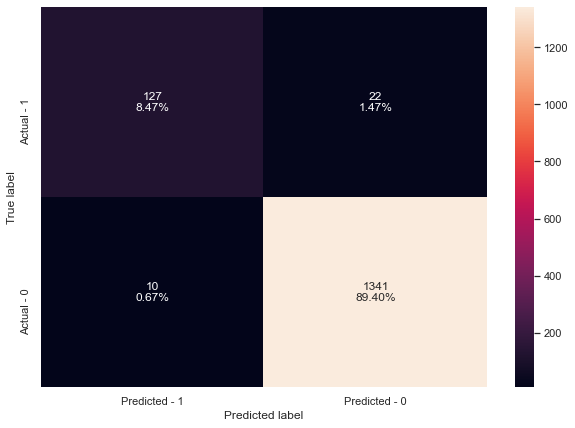

In [88]:
make_confusion_matrix(model,X_test,y_test)

In [89]:
scores_LR = get_metrics_score(model,X_train,X_test,y_train,y_test,flag=True)

Accuracy on training set :  1.0
Accuracy on test set :  0.9786666666666667
Recall on training set :  1.0
Recall on test set :  0.8523489932885906
Precision on training set :  1.0
Precision on test set :  0.927007299270073
F1 on training set :  1.0
F1 on test set :  0.8881118881118881


* Recall on the training set is 1 and on the test set is 0.85. Overall it looks like a good model but it seems to be overfitting

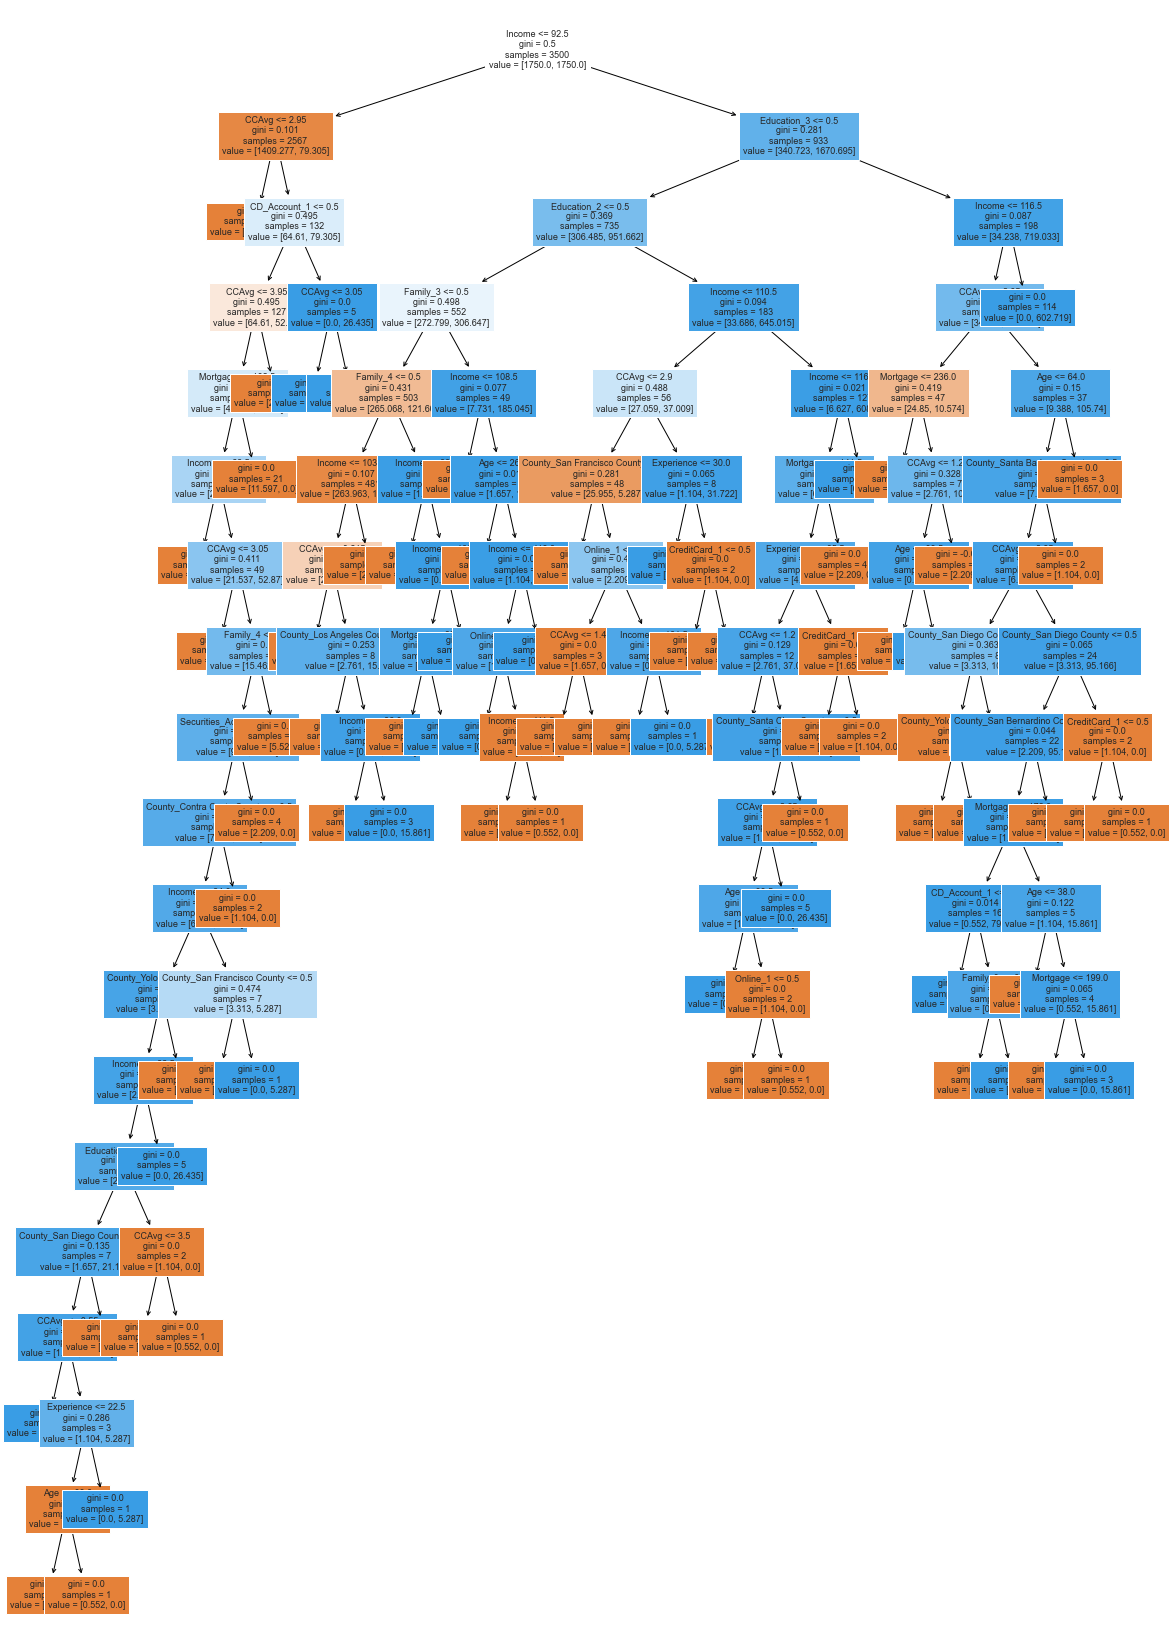

In [90]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [91]:
print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [8.28, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [6.07, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |   |   |--- Securities_Account_1 <= 0.50
|   |   |   |   |   |   |   |   |   |--- County_Contra Costa County <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Income <= 84.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- Income >  84.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |

In [92]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
df = pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)
df['Imp'] = df['Imp'].apply(lambda x: "{:.6f}".format(x))
df

,Imp
Income,0.630143
CCAvg,0.091371
Family_4,0.081030
Education_2,0.063365
Family_3,0.061813
Education_3,0.022178
Mortgage,0.013875
CD_Account_1,0.007515
County_San Francisco County,0.005567
County_San Diego County,0.004632


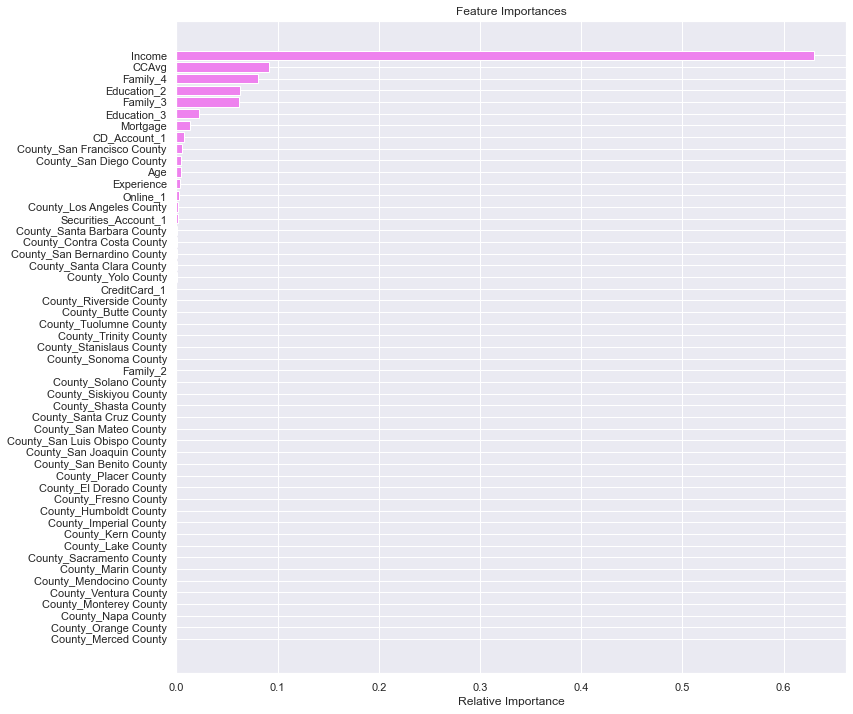

In [93]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* According to the tree, Income seems like the most important feature to decide if a user is interested in buying a personal loan

### Reducing over fitting

#### Hyper paramater tuning using GridSearchCV

In [94]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1,class_weight = 'balanced')

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,17),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=1, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1)

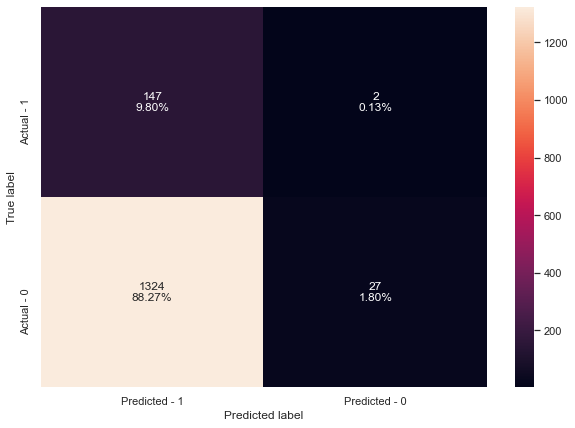

In [95]:
make_confusion_matrix(estimator,X_test,y_test)

In [96]:
scores_LR = get_metrics_score(estimator,X_train,X_test,y_train,y_test,flag=True)

Accuracy on training set :  0.11457142857142857
Accuracy on test set :  0.116
Recall on training set :  0.9969788519637462
Recall on test set :  0.9865771812080537
Precision on training set :  0.09626604434072346
Precision on test set :  0.09993201903467029
F1 on training set :  0.1755786113328013
F1 on test set :  0.1814814814814815


* Since we specified recall as the scoring metric, the model is entirely biased towards increasing the recall. Though the recall is very high, this model is entirely unacceptable because of the tremendosuly low accuracy and precision scores. 

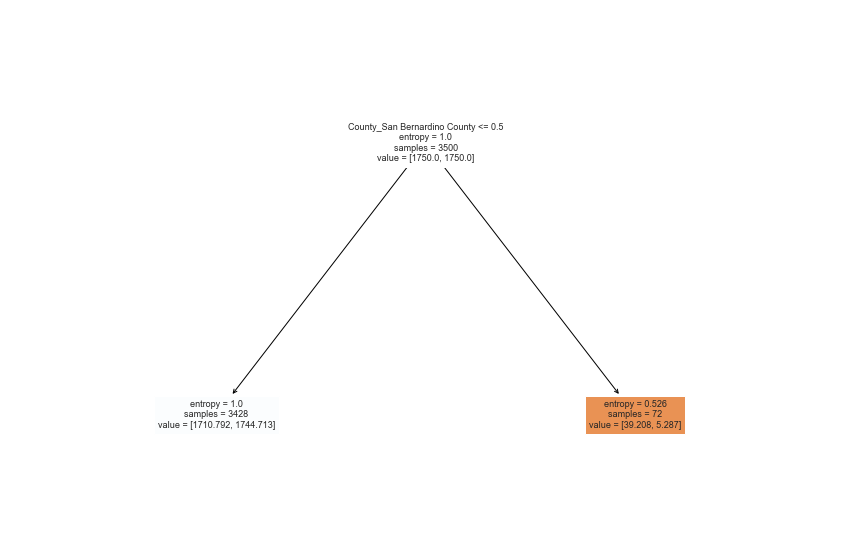

In [97]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [98]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- County_San Bernardino County <= 0.50
|   |--- weights: [1710.79, 1744.71] class: 1
|--- County_San Bernardino County >  0.50
|   |--- weights: [39.21, 5.29] class: 0



#### Tuning hyper parameters using recall actually made things worse. Let's try using a different scoring metric - balanced accuracy

In [99]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1,class_weight = 'balanced')

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,17),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring='balanced_accuracy',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=11, max_features='sqrt',
                       min_impurity_decrease=0.0001, random_state=1)

In [100]:
scores_LR = get_metrics_score(estimator,X_train,X_test,y_train,y_test,flag=True)

Accuracy on training set :  0.8794285714285714
Accuracy on test set :  0.8546666666666667
Recall on training set :  1.0
Recall on test set :  0.8053691275167785
Precision on training set :  0.4395750332005312
Precision on test set :  0.3883495145631068
F1 on training set :  0.61070110701107
F1 on test set :  0.5240174672489083


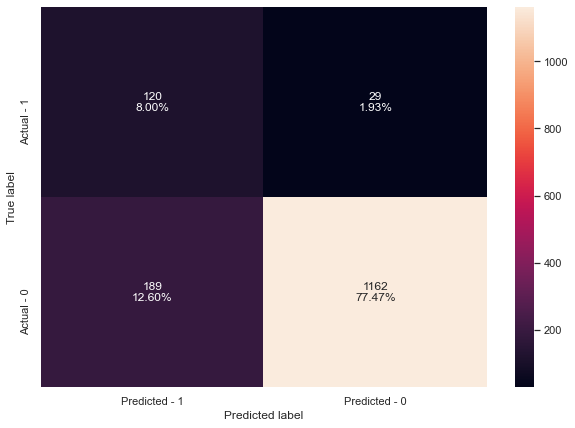

In [101]:
make_confusion_matrix(estimator,X_test,y_test)

* Observations
1. Using balanced accuracy as metric in hyper paramter using gave better results than using recall.
2. Tree without pruning gave much better performance than with pre pruning

## Cost Complexity Pruning


The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [102]:
clf = DecisionTreeClassifier(random_state=1,class_weight = 'balanced')
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [103]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-3.581012e-15
1,2.102032e-19,-3.580802e-15
2,3.853725e-19,-3.580416e-15
3,3.853725e-19,-3.580031e-15
4,3.853725e-19,-3.579646e-15
5,3.853725e-19,-3.579260e-15
6,5.255079e-19,-3.578735e-15
7,5.255079e-19,-3.578209e-15
8,7.882619e-19,-3.577421e-15
9,1.786727e-18,-3.575634e-15


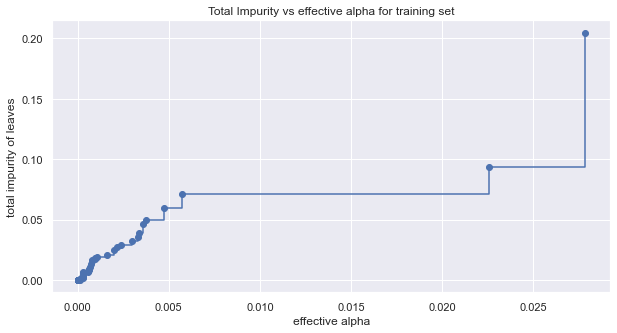

In [104]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

* We can see the total impurity of the leaves is increasing with increase in alpha

In [105]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = 'balanced')
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2953792759992314


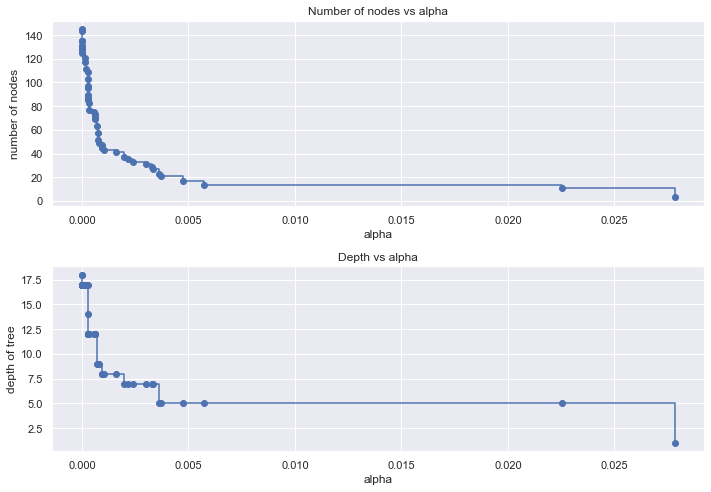

In [106]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

* With increase in alpha, the number of nodes and the depth of the tree decreases

In [107]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)    

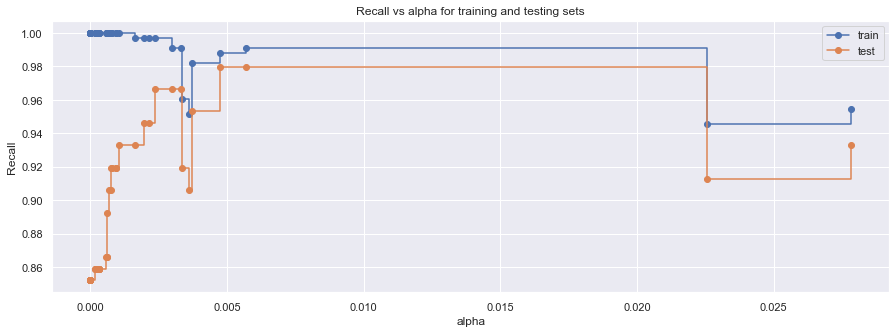

In [108]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [109]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.004754778197299605, class_weight='balanced',
                       random_state=1)


* We are getting maximum recall on test set when alpha is 0.0047. At this point, recall on both test data and training data is good

In [110]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004754778197299605, class_weight='balanced',
                       random_state=1)

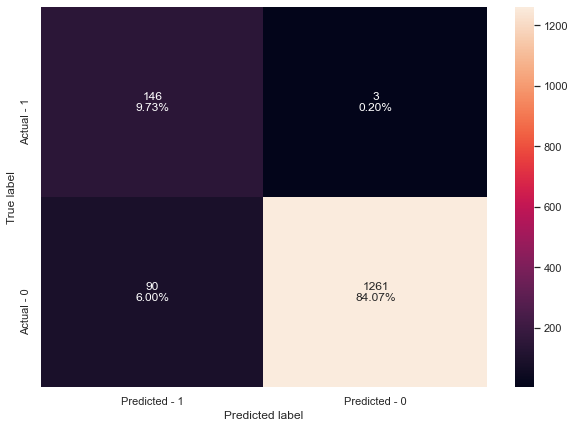

In [111]:
make_confusion_matrix(best_model,X_test,y_test)

In [112]:
scores_LR = get_metrics_score(best_model,X_train,X_test,y_train,y_test,flag=True)

Accuracy on training set :  0.9391428571428572
Accuracy on test set :  0.938
Recall on training set :  0.9879154078549849
Recall on test set :  0.9798657718120806
Precision on training set :  0.6100746268656716
Precision on test set :  0.6186440677966102
F1 on training set :  0.754325259515571
F1 on test set :  0.7584415584415585


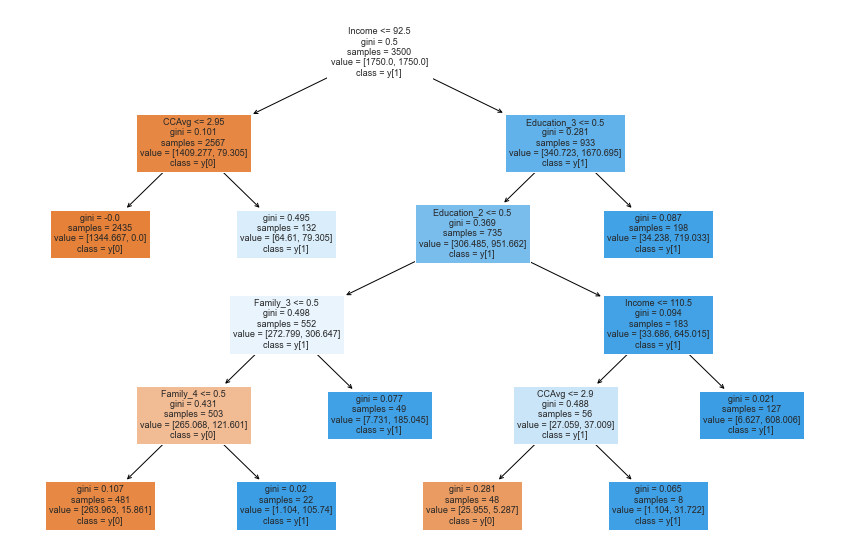

In [113]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,class_names=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

* After post pruning, the decision tree is much more interpretable.

In [114]:
y_train.value_counts()

0    3169
1     331
Name: Personal_Loan, dtype: int64

In [115]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [263.96, 15.86] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [1.10, 105.74] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [7.73, 185.05] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- Income <= 110.50
|   |   |   |   |--- CCAvg <= 2.90
|   |   |   |   |   |--- weights: [25.95, 5.29] class: 0
|   |   |   |   |--- CCAvg >  2.90
|   |   |   |   |   |--- weights: [1.10, 31.72] class: 1
|   |   |   |--- Income >  110.50
|   |   |   |   |--- weights: [6.63, 608.01] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [34.24, 719.03] class: 1



In [116]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Income                         0.682995
Family_4                       0.087270
Education_2                    0.071891
Family_3                       0.069482
CCAvg                          0.064375
Education_3                    0.023987
County_San Diego County        0.000000
County_San Mateo County        0.000000
County_San Luis Obispo County  0.000000
County_San Joaquin County      0.000000
County_San Francisco County    0.000000
Age                            0.000000
County_San Bernardino County   0.000000
County_Santa Clara County      0.000000
County_San Benito County       0.000000
County_Sacramento County       0.000000
County_Santa Barbara County    0.000000
County_Siskiyou County         0.000000
County_Santa Cruz County       0.000000
County_Shasta County           0.000000
County_Placer County           0.000000
County_Solano County           0.000000
County_Sonoma County           0.000000
County_Stanislaus County       0.000000


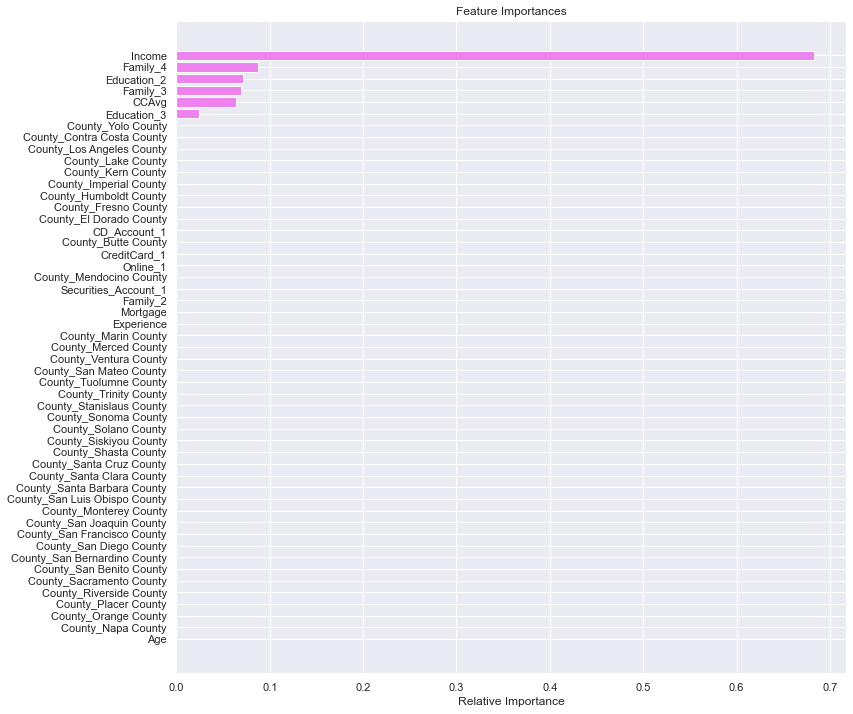

In [117]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Income is the most important feature to predict if a user wants to buy personal loan
* Family and Education features also play a decent role in the prediction

### Comparing all the decision tree models

In [118]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 'Train_Recall':[1,1,0.98], 'Test_Recall':[0.85,0.80,0.979]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00,0.850
1,Decision treee with hyperparameter tuning,1.00,0.800
2,Decision tree with post-pruning,0.98,0.979


**Decision tree model with post pruning has given the best recall score on data.**

## Actionable Insights & Recommendations

### Logistic Regression vs Decision trees

#### Performance comparision

In [119]:
comparison_frame = pd.DataFrame({'Model':['Final logistic regression model','Final decision treee model',],
                                 'Train_Recall':[0.96, 0.98], 'Test_Recall':[0.946,0.979]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Final logistic regression model,0.96,0.946
1,Final decision treee model,0.98,0.979


* We can see that we acheived better performance with the decision tree model. 

#### Other notable points/differences

1. Both logistic regression model and decision tree model revealed that the income is the most important feature
2. Decision trees are much easier to interpret than logistic regression.
3. Decision tree works amazing even without much data handling such as outlier treatment and missing values treatment
4. Additionally in logistic regression, we need to accommodate the assumptions of logistic regression, coming up with right threshold, perform data handling such as outlier and missing value treatments.
5. Decision trees are highly prone to overfitting but pruning techniques seems really useful to address this problem.

### Misclassification analysis

* Since our best model is created by decision tree, let's do misclassification analysis of the results given by this model. The idea is to filter out the samples where Actual label is 1 and the predicted label is 0 - meaning we predicted the user won't buy a personal loan but they actually did

In [120]:
# Create a data frame containing the columns actual label and predicted label along with test data
data_missed = X_test.copy()
data_missed['Actual_label'] = y_test
data_missed['Predicted_label'] = best_model.predict(X_test)

In [121]:
# Filter out misclassified samples
data_missed = data_missed[data_missed['Actual_label'] == 1]
data_missed = data_missed[data_missed['Actual_label'] != data_missed['Predicted_label']]

In [122]:
data_missed

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County,Actual_label,Predicted_label
322,63,39,101,3.9,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1126,32,8,104,3.7,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2539,32,7,98,4.2,171,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


* Only three samples from the test data are misclassfied 

In [123]:
decision_paths = best_model.decision_path(X_test[X_test.index.isin([322, 1126, 2539])], check_input=True)

In [124]:
# Print the decision paths for these three samples.
decision_path_list = list(decision_paths.toarray())
for path in decision_path_list:
    print(path)

[1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0]
[1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0]
[1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0]


* It's very interesting to know that all the misclassified samples have the same decision path. The decision path is 
Income>92.5 & Education_3=0 & Education_2=0 & Family_3=0 & Family_4=0 -----> Doesn't buy personal loan
* All these samples have high income but their education is just undergrad and they don't have more than 2 members in the family. In this case, our decision tree predicted that they won't be buying a personal loan. 

## Recommendations to the marketing team

1. It is highly recommended to target people with higher range of income.
2. It is also advised to target people who have higher education.
3. It is a good idea to target people with number of family members > 2. 
4. As also indicated in the above 3 points, people with high income, high education and more members in the family must be targeted for personal loan campaign.
5. It is also observed that people who have mortgages might also prefer to get a personal loan too.
6. It is observed that people with high Credit card spending might be interested in a personal loan.
7. The odds of a person who has a CD account buying a personal loan is more than a person without CD account
8. People in some counties such as Riverside, LosAngles could be targeted specifically. This is based on coefficients importance produced by logistic regression.